# Types of Missing Data
###### 
1- Missing Completely at Random(MCAR)
Missing Completely at Random (MCAR) Missing Completely at Random is pretty straightforward. What it means is what is says: the propensity for a data point to be missing is completely random. There's no relationship between whether a data point is missing and any values in the data set, missing or observed

2- Missing not at random (MNAR) 
also known as nonignorable nonresponse is data that is neither MAR nor MCAR (i.e. the value of the variable that's missing is related to the reason it's missing).

3- Missing at Random(MAR)
means the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data. Whether or not someone answered #13 on your survey has nothing to do with the missing values, but it does have to do with the values of some other variable.

###### https://www-users.york.ac.uk/~mb55/intro/typemiss4.htm

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isnull().sum()   #Tells How many null values are there in every column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df[df['Embarked'].isnull()]    #Show the data where there is missing values in "Embarked" column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### 2- Missing Data Not At Random(MNAR): Systematic Missing Data
There is a relationship between data missing and any other value missing or observed, within the dataset.

In [5]:
#Making an other column 'Cabin_null' and it is initialized with values 0,1 when there is a null value in 'Cabin' column

df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0) 
df['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int32

In [6]:
#Find the percentage of null values

df['Cabin_null'].mean()

0.7710437710437711

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [8]:
#It's means that where values in "Cabin_null" are missing. Most of them are not servived(0) that's why there percentage is higher
# and where mean is less, so they are survived(1).

df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

### 3- Missing At Random(MAR)
Like:
Men --- Hide their salaries
Women --- Hide their Age

### All the techniques to handle missing values

1- Mean/Median/Mode replacement
2- Random Sample Imputation
3- Capturing NAN values with a new feature
4- End of Distribution Imputation
5- Arbitrary Imputation
6- Frequent Categories Imputation

### Mean/Median/ Mode Imputation
When to apply this?
Mean/Median imputation has tha assumption that the data are missing completely at random(MAR). 
We solve this by replacing the NaN with most frequent occurance of the variable.
To overcome the outliers we use Media or mode.

In [9]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
# Percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [11]:
# We make a function to impute nan values and give parameters, dataset, column name, median.
# in 2nd line we make a new column and fill it with median where there is a nan values in the each column like age,fare,survived

def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)

In [12]:
median = df.Age.median()
median

28.0

In [13]:
impute_nan(df, 'Age', median) #Function call
df.head()                #Now we get column "Age_median" and here all null values of Age is convert to median

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [14]:
print(df['Age'].std())
print(df['Age_median'].std())    #Standard Deviatipon of 'Age_median' column is less because we handle missing value

14.526497332334044
13.019696550973194


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

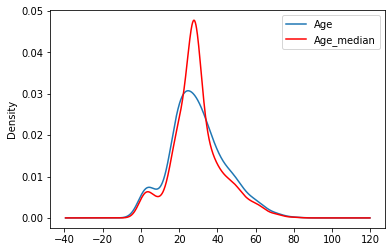

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df['Age_median'].plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

### Disadvantages of Mean/Median
1- Impact correlation
2- change or distortion in the original variance

### Disadvantages of Mean/Median
1- Easy to implement
2- Faster way to get complete dataset

### 2 Random Sample Imputation
It takes random observation from the data set and use this observation to replace the missing values with it.

When should it be used?
When data are missing completely at random(MCAR).

In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [20]:
#Check percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [21]:
df['Age'].isnull().sum()

177

In [22]:
#First we are dropping nan values from Age column, then we are picking samples of present or real values and replace
#them with 177 null values and with random state = 0. Sample values will remain same. it will not change everytime

df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 0)  

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [23]:
#Getting indexes where there are null values

df[df['Age'].isnull()].index


Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [24]:
#Create a function to replace tha nan values with random observation

def impute_nan(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    
    #It will consists of random samples through which we fill nan values
    random_smpl = df[variable].dropna().sample(df[variable].isnull().sum(), random_state = 0)
    
    #Pandas need to have same index in order to merge dataset
    random_smpl.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_smpl

In [25]:
median = df['Age'].median()
median

28.0

In [26]:
impute_nan(df, 'Age', median)

In [27]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

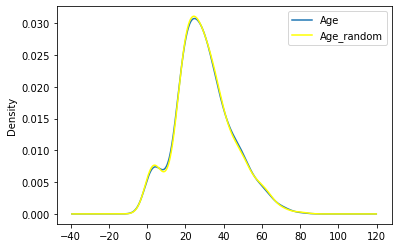

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df.Age_random.plot(kind = 'kde', ax = ax, color = 'yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

### Advantages
1- There is less distortion in variance

### 3- Capturing NaN values with a new feature

This work well when the data are not missing completely at random

In [30]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Survived', 'Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [31]:
df['Age_NaN'] = np.where(df['Age'].isnull(),1, 0)  
df.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [32]:
df.Age.median()

28.0

In [33]:
df['Age'].fillna(df.Age.median(), inplace = True)
df.head(50)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantage
1- Easy to implement
2- Captures the importance of missing values

#### Disadvantages
1- Creating Additional Features (Curse of Dimensionality)

### 3- End of Distribution Imputation
Get data away from 3 standard deviation

In [34]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

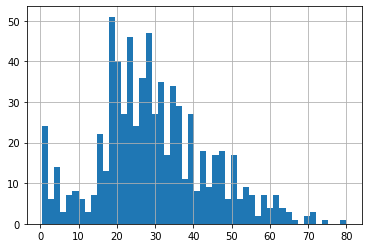

In [36]:
df.Age.hist(bins = 50)

In [37]:
#Pick right end of distribution of data to replace all NaN Values

extreme = df.Age.mean()+3*df.Age.std()   
extreme

73.27860964406095

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

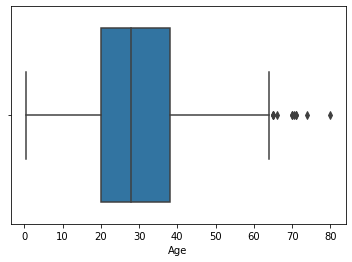

In [38]:
import seaborn as sns
sns.boxplot('Age', data = df)   #From this we get outliers

In [39]:
def impute_NaN(df, median, extreme, variable):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True) 

#Becaue we want to compute 'Age' and 'Age_end_distribution_imputstion'

In [40]:
impute_NaN(df, df.Age.median(), extreme, 'Age')

In [41]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

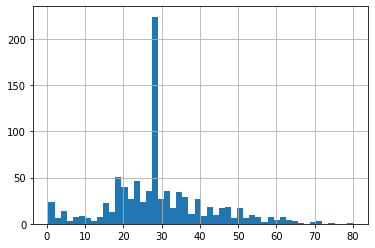

In [42]:
df['Age'].hist(bins = 50)     #Because we give median value in nan values in feature 'Age'

<AxesSubplot:>

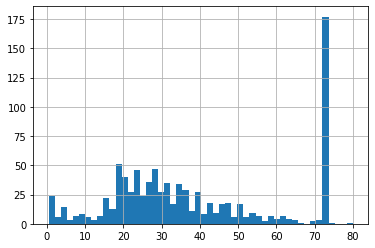

In [43]:
df['Age_end_distribution'].hist(bins=50)

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

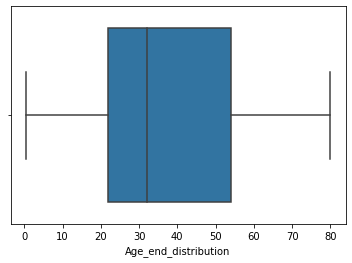

In [44]:
sns.boxplot('Age_end_distribution', data = df) 

#Now in box plot we see that there is no outlierrs by usinng end of distribution

#### Advantages:
1- Outliers are captured by using the end distribution

# Arbitrary Value Imputation
It consists of replacing NaN values with an arbitrary values
For each and every feature arbitrary value should be different

what is aaaarbitrary Value?
1- Here, we take thae last outlier value and can also take the least outlier value.
2- It is used to see the importance of missing values
3- 

In [45]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv('train.csv', usecols= ['Age', 'Survived', 'Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [47]:
def impute_NaN(df, variable):
    df[variable+'Zeros'] = df[variable].fillna(0)
    df[variable+'Hundreds'] = df[variable].fillna(100)

In [48]:
impute_NaN(df, 'Age')

In [49]:
df.head()

,Survived,Age,Fare,AgeZeros,AgeHundreds
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


<AxesSubplot:>

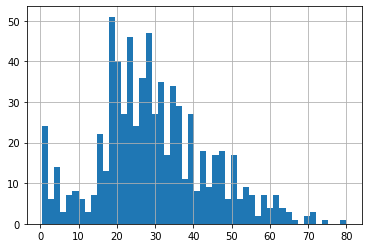

In [50]:
df['Age'].hist(bins = 50)

### How to handle categorical missing values
#### 1- Frequent Category Imputation
 

In [51]:
import pandas as pd

In [52]:
df.columns

Index(['Survived', 'Age', 'Fare', 'AgeZeros', 'AgeHundreds'], dtype='object')

In [53]:
df = pd.read_csv('house.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [54]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [55]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [56]:
df.isnull().sum()

#As we seen that BsmtQual abd GarageType has less nan values so we replace it with more frequent tcategories

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [57]:
#To find maximum number of frequent features

df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

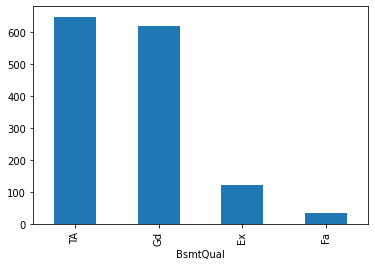

In [58]:
 df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = False).plot.bar()

In [59]:
df['BsmtQual'].value_counts()     #Method to get most frequent category

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

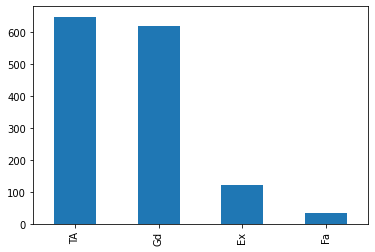

In [60]:
df['BsmtQual'].value_counts().sort_values(ascending = False).plot.bar()

In [61]:
df.groupby(['GarageType'])['GarageType'].count()    #Code to get categories which is most frequenting

GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageType'>

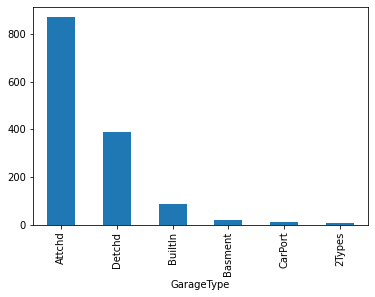

In [62]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending = False).plot.bar()

<AxesSubplot:>

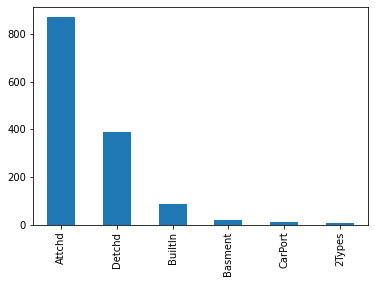

In [63]:
df['GarageType'].value_counts().plot.bar()

In [64]:
df['FireplaceQu'].mode()[0]    #Code to get most frequent category

'Gd'

In [65]:
df['FireplaceQu'].value_counts()   # You can also get most frequent category by this code

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [66]:
df['BsmtQual'].value_counts().index[0]    #Another method to get most frequent category

'TA'

<AxesSubplot:>

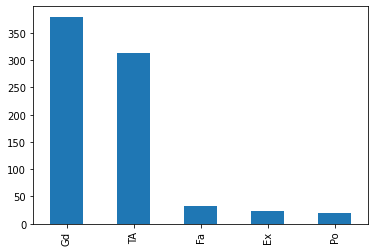

In [67]:
df['FireplaceQu'].value_counts().plot.bar()

In [68]:
#### Replacing functions
def impute_NaN(df, variable):
    mst_frequent = df[variable].value_counts().index[0]
    df[variable].fillna(mst_frequent, inplace = True)


In [69]:
for features in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_NaN(df, features)

In [70]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

## Disadvantage
when you have high missing values then should not used this technique.
because this will distort the relationship of most frequent categories with dependent variables

# 2- Adding a variable tu capture NaN

In [71]:
df = pd.read_csv('house.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [72]:
import numpy as np
#Capturing the importance of null values

df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(), 1, 0)  
df 

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0
1456,Gd,TA,Attchd,210000,0
1457,TA,Gd,Attchd,266500,0
1458,TA,NaN,Attchd,142125,0


In [73]:
frequent = df['BsmtQual'].mode()[0]    #getting Most frequent  category

In [74]:
df['BsmtQual'].fillna(frequent, inplace = True)    #replacing most frequent item to null valuees in 'BsmtQual'
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [75]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1, 0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace = True)

In [76]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### If you have more frequent categories, we just replace NAN with a new category

### Advantages
#### 1- If we have many null values then we have to use this technique

### Disadvantages:
#### 1- Many feature will come to existance

In [77]:
df = pd.read_csv('house.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [78]:
def impute_NaN(df, variable):
    df[variable+'_var2'] = np.where(df[variable].isnull(),'Missing', df[variable])

In [79]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_NaN(df, feature)

In [80]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var2,FireplaceQu_var2,GarageType_var2
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [81]:
#Most use technique to replace nan with new category

df = df.drop(['BsmtQual', 'FireplaceQu', 'GarageType'], axis = 1)

In [82]:
df

,SalePrice,BsmtQual_var2,FireplaceQu_var2,GarageType_var2
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd
